##Name: Aashi Aggarwal
##Id: 8920299

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [147]:
#Load Dataset
df = pd.read_csv("Student_Performance.csv")
df.head()



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [148]:
print(df.shape)

(1000, 8)


In [149]:
#Check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [150]:
#If checking the our dataset has any duplicated values present or not

df.duplicated().sum()

0

In [151]:
#check the null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [152]:
#Check the Number of Unique Values in Each Column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [153]:
#Exploring Unique Data
print("Categories in 'gender' variable:  ",end=" ")
print(df["gender"].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df["race/ethnicity"].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(df["parental level of education"].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df["lunch"].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(df["test preparation course"].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [154]:


#define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != "object"] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == "object"] 

print("We have {} numerical features: {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Gender Column
How is distribution of Gender?

Is gender has any impact on student’s performance?

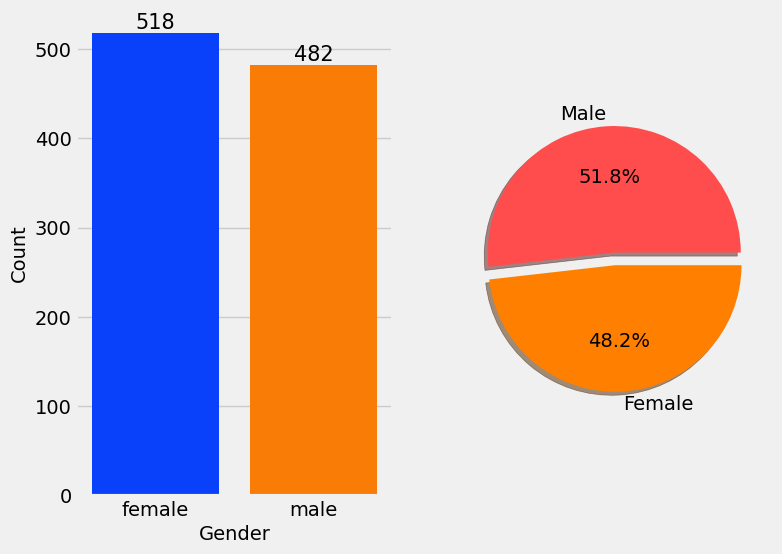

In [155]:


# Create a figure with two subplots
f,ax=plt.subplots(1,2,figsize=(8,6))


# Create a countplot of the 'gender' column and add labels to the bars
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

# Set font size of x-axis and y-axis labels and tick labels
ax[0].set_xlabel('Gender', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(labelsize=14)

# Create a pie chart of the 'gender' column and add labels to the slices
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'], textprops={'fontsize': 14})

# Display the plot
plt.show()

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

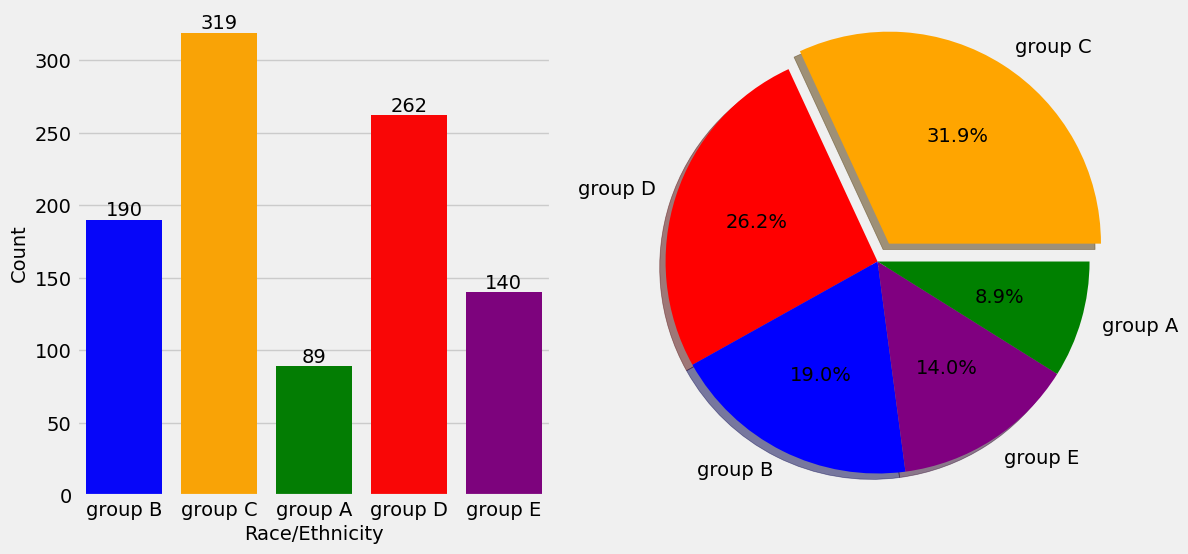

In [156]:
#Race/Ethnicity Column

# Define a color palette for the countplot
colors = ['blue', 'orange', 'green', 'red', 'purple']


# Create a figure with two subplots
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# Create a countplot of the 'race/ethnicity' column and add labels to the bars
sns.countplot(x=df['race/ethnicity'], data=df, palette=colors, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)

# Set font size of x-axis and y-axis labels and tick labels
ax[0].set_xlabel('Race/Ethnicity', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(labelsize=14)

# Create a dictionary that maps category names to colors in the color palette
color_dict = dict(zip(df['race/ethnicity'].unique(), colors))

# Map the colors to the pie chart slices
pie_colors = [color_dict[race] for race in df['race/ethnicity'].value_counts().index]

# Create a pie chart of the 'race/ethnicity' column and add labels to the slices
plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True, colors=pie_colors, textprops={'fontsize': 14})

# Set the aspect ratio of the pie chart to 'equal' to make it a circle
plt.axis('equal')

# Display the plot
plt.show()



Most of the student belonging from group C /group D.
Lowest number of students belong to group A.

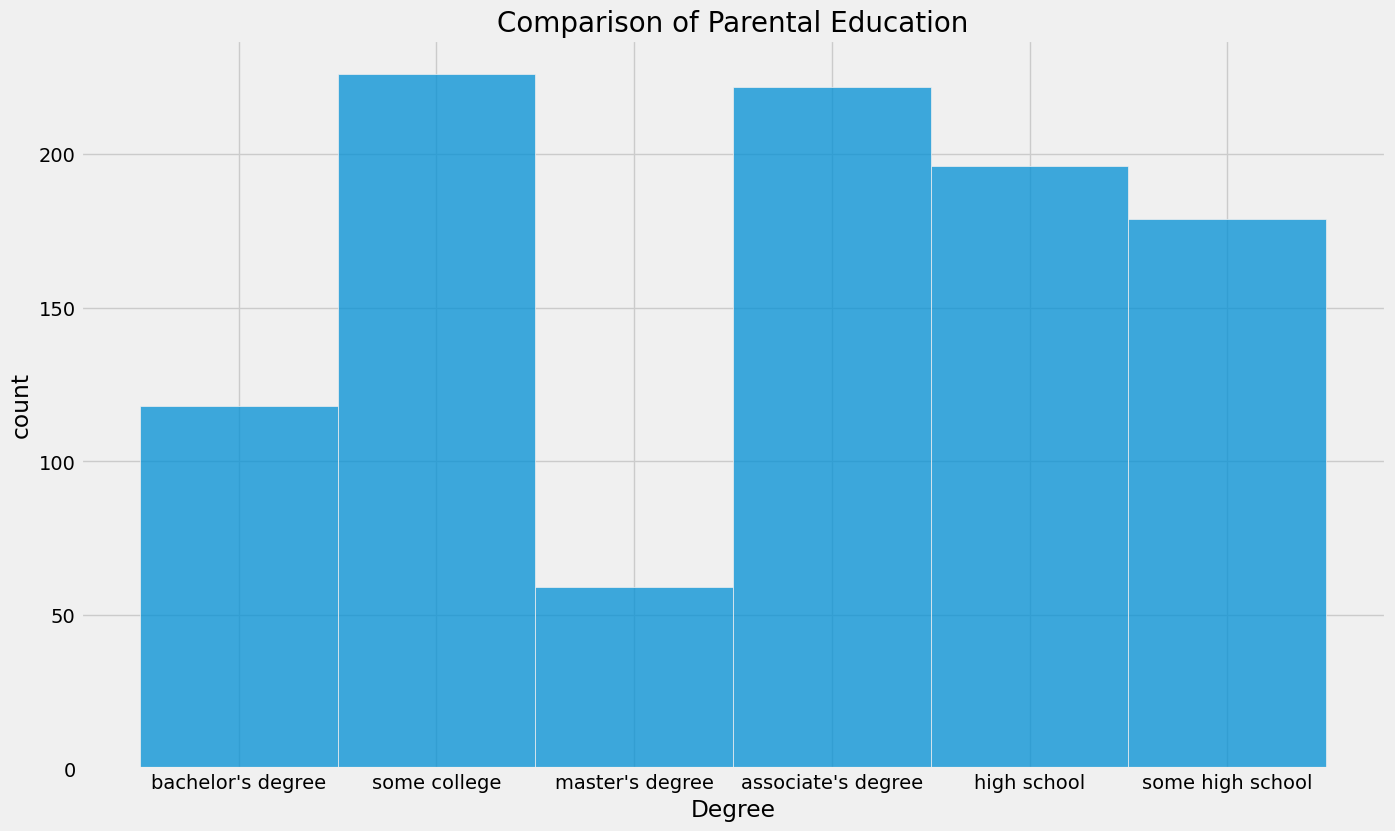

In [157]:
#Parental Level of Education Column
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.histplot(df["parental level of education"], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()



Largest number of parents are from college.

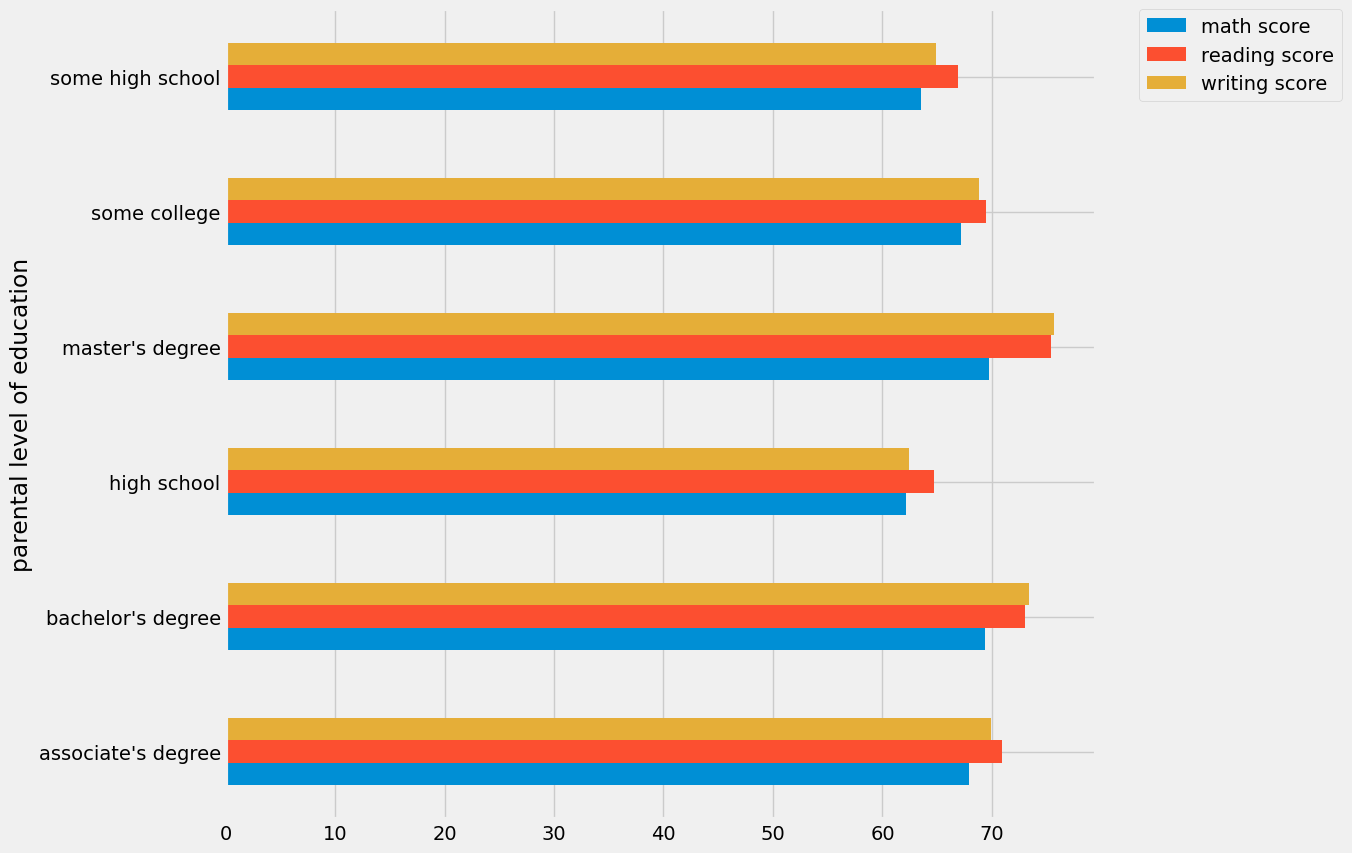

In [158]:

#Grouping to show parental level wrt marks
df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



Parents who have college degrees shows good scores for the learners. Majorly above 65.

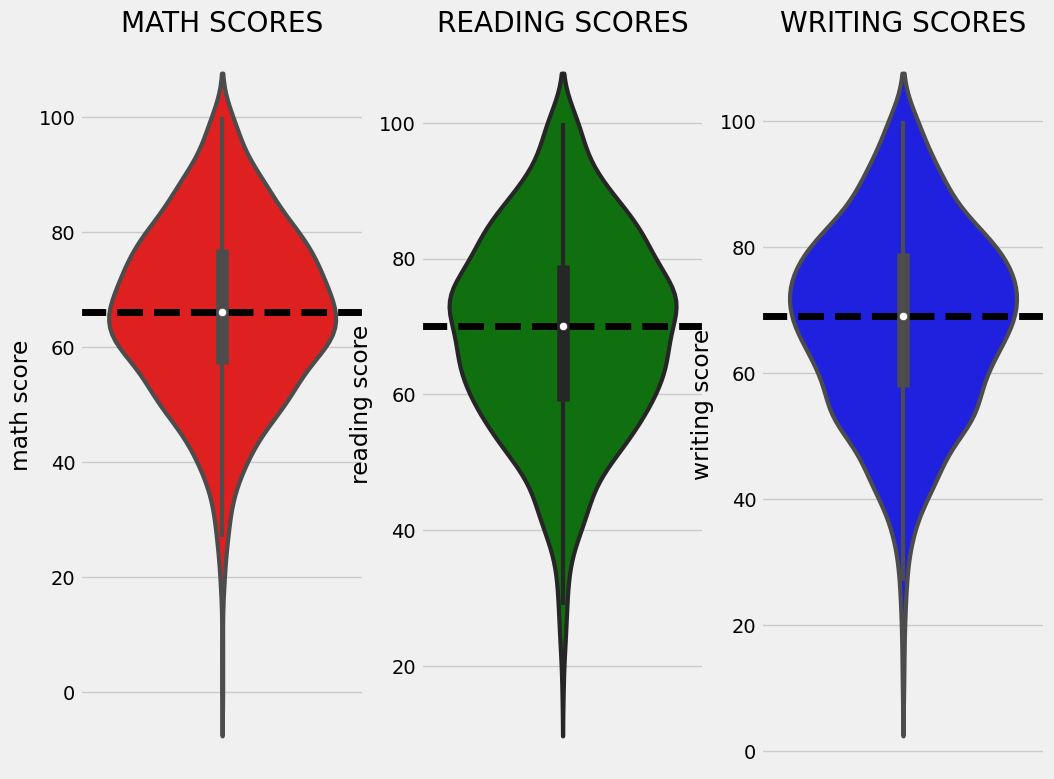

In [159]:
figsize=(18,8)

plt.subplot(1, 4, 1) 
plt.title('MATH SCORES') 
ax = plt.gca()
median_m = df['math score'].median()
ax.axhline(y=median_m, color='black', linestyle='--', linewidth=5)
sns.violinplot(y='math score',data=df,color='red',linewidth=3) 


plt.subplot(1, 4, 2) 
plt.title('READING SCORES') 
ax = plt.gca()
median_r = df['reading score'].median()
ax.axhline(y=median_r, color='black', linestyle='--', linewidth=5)
sns.violinplot(y='reading score',data=df,color='green',linewidth=3) 


plt.subplot(1, 4, 3) 
plt.title('WRITING SCORES') 
ax = plt.gca()
median_w = df['writing score'].median()
ax.axhline(y=median_w, color='black', linestyle='--', linewidth=5)
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3) 
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80.

(-1.25, 1.25, -1.25, 1.25)

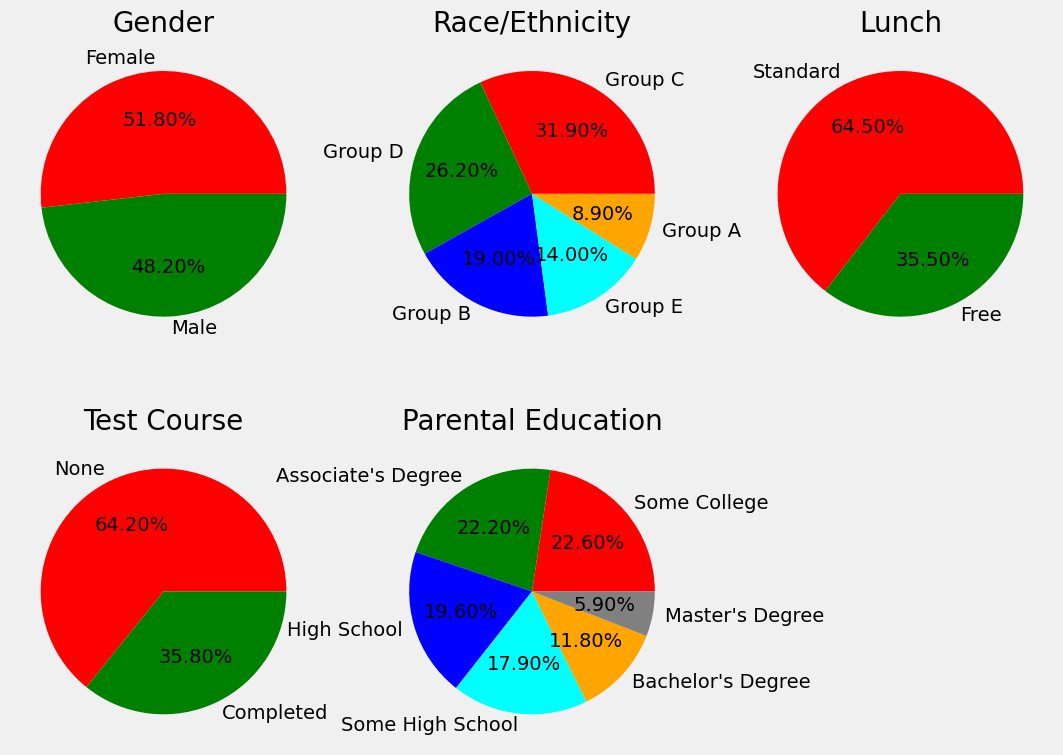

In [160]:
plt.rcParams['figure.figsize'] = (12, 9)

# First row of pie charts
plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Second row of pie charts
plt.subplot(2, 3, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

The number of Male and Female students is almost equal.
The number of students is higher in Group C.
The number of students who have standard lunch is greater.
The number of students who have not enrolled in any test preparation course is greater.
The number of students whose parental education is “Some College” is greater followed closely by “Associate’s Degree”.
From the above plot, it is clear that all the scores increase linearly with each other.

Student’s Performance is related to lunch, race, and parental level education.

Females lead in pass percentage and also are top-scorers.
Student Performance is not much related to test preparation course.
The finishing preparation course is beneficial.

##MODEL TRAINING

In [161]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV 

from xgboost import XGBRegressor 
import warnings

In [162]:
X = df.drop(columns=["math score"], axis=1) #Categorical
y = df["math score"] #Numerical


In [163]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer( [ ("OneHotEncoder", oh_transformer, cat_features), ("StandardScaler", numeric_transformer, num_features), ] ) 
X = preprocessor.fit_transform(X)

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [165]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [166]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    #"XGBRegressor": XGBRegressor()
    "Decision Tree": DecisionTreeRegressor()
    
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2) 
    print('='*35) 
    print('\n')



Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Squared Error: 28.3485
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.3097
- Mean Squared Error: 5.3346
- Mean Absolute Error: 1.8266
- R2 Score: 0.9763
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9289
- Mean Squared Error: 5.9289
- Mean Absolute Error: 4.5963
- R2 Score: 0.8555


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Squared Error: 0.0781
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.7910
- Mean Squared Error: 7.7910
- Mean Absolu

Hyperparameter Tuning
It will give the model with most accurate predictions and improve prediction accuracy.

This will give the optimized value of hyperparameters, which maximize your model predictive accuracy.

In [167]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

# Define hyperparameter ranges for each model
param_grid = {
    "Linear Regression": {},
    "Decision Tree": {"max_depth": [3, 5, 7],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']},
    "Random Forest Regressor": {'n_estimators': [8,16,32,64,128,256], "max_depth": [3, 5, 7]},
    #"XGBRegressor": {'depth': [6,8,10],'learning_rate': [0.01, 0.05, 0.1],'iterations': [30, 50, 100]},
    
}

In [168]:
model_list = []
r2_list =[]
from sklearn.model_selection import GridSearchCV, train_test_split

for model_name, model in models.items():
    # Create a scorer object to use in grid search
    scorer = make_scorer(r2_score)

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(
        model, 
        param_grid[model_name], 
        scoring=scorer, 
        cv=5,
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train) 
    # Make predictions 
    y_train_pred = grid_search.predict(X_train) 
    y_test_pred = grid_search.predict(X_test) 

    # Evaluate Train and Test dataset 
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred) 
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred) 
    print(model_name) 
    model_list.append(model_name) 
    print('Best hyperparameters:', grid_search.best_params_) 
    print('Model performance for Training set') 
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse)) 
    print("- Mean Squared Error: {:.4f}".format(model_train_mse)) 
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae)) 
    print("- R2 Score: {:.4f}".format(model_train_r2)) 
    print('----------------------------------') 
    print('Model performance for Test set') 
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse)) 
    print("- Mean Squared Error: {:.4f}".format(model_test_rmse)) 
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae)) 
    print("- R2 Score: {:.4f}".format(model_test_r2)) 
    r2_list.append(model_test_r2) 
    print('='*35) 
    print('\n')


Linear Regression
Best hyperparameters: {}
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Squared Error: 28.3485
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Random Forest Regressor
Best hyperparameters: {'max_depth': 7, 'n_estimators': 256}
Model performance for Training set
- Root Mean Squared Error: 4.1576
- Mean Squared Error: 17.2859
- Mean Absolute Error: 3.3712
- R2 Score: 0.9233
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.7708
- Mean Squared Error: 5.7708
- Mean Absolute Error: 4.4783
- R2 Score: 0.8631


Decision Tree
Best hyperparameters: {'criterion': 'squared_error', 'max_depth': 5}
Model performance for Training set
- Root Mean Squared Error: 5.7173
- Mean Squared Error: 32.6874
- Mean Absolute Error: 4.6396
- R2 

In [169]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.880345
1,Random Forest Regressor,0.863145
2,Decision Tree,0.824230


In [170]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)


 Accuracy of the model is 88.03


Text(0, 0.5, 'Predicted')

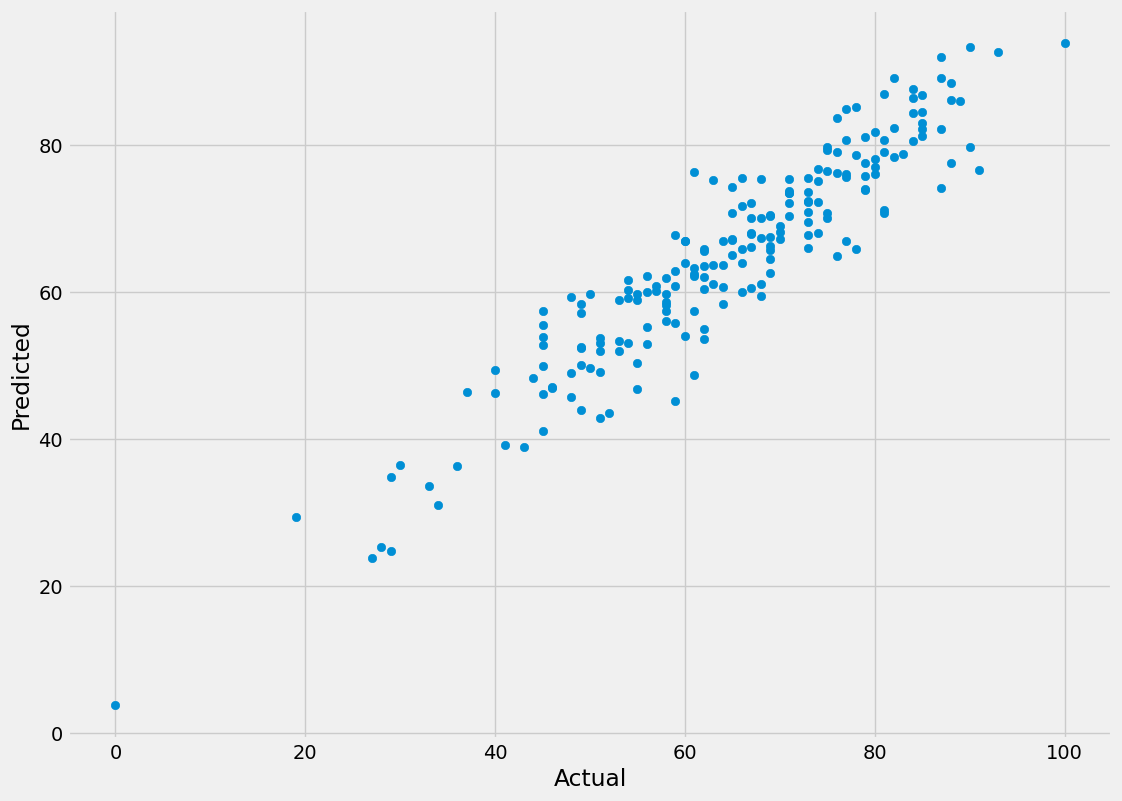

In [171]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

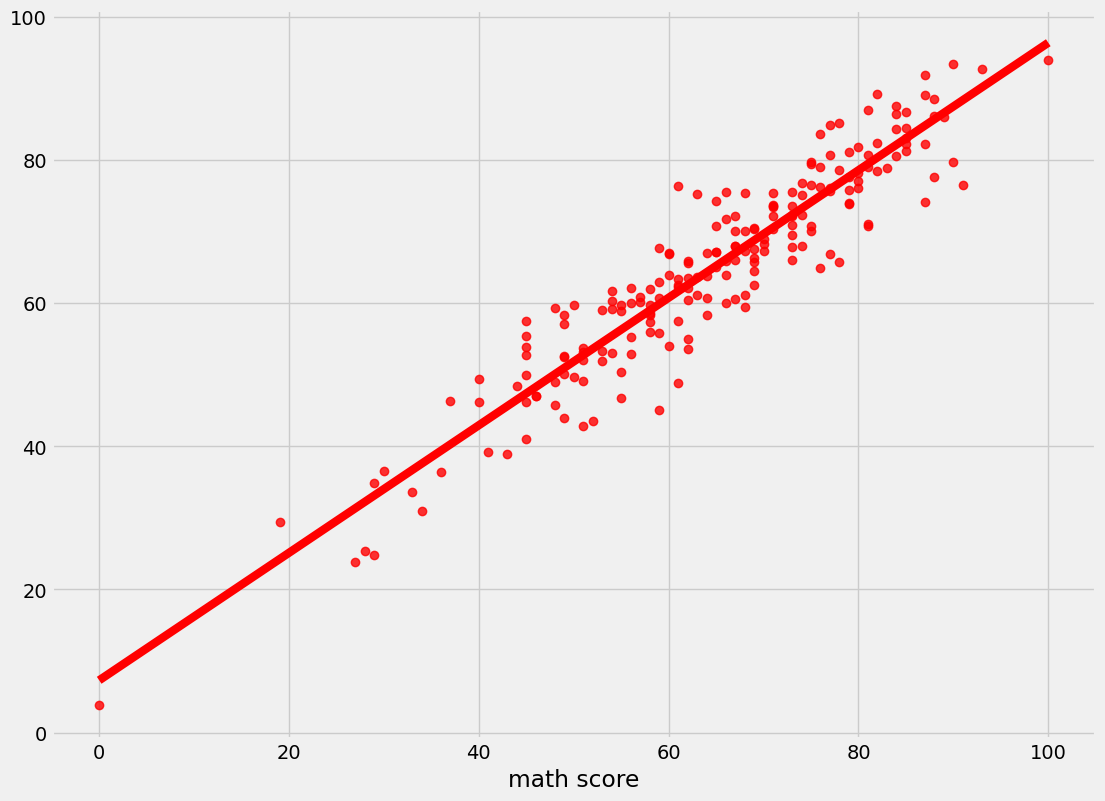

In [172]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})




In [173]:
pred_df.to_csv("prediction.csv", index=False)
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812


REFERENCE:
DATASET: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

##reference:
https://www.kaggle.com/code/nitindongare/student-data-analysis-and-prediction-using-ml

Reference:https://www.kaggle.com/code/ahmedelsayedtaha/students-performance-analysis
